In [1]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.12 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.12.5"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.12.5"):
    print(FAIL, "Python version 3.12.5 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "1.26.4", 'matplotlib': "3.9.2",'sklearn': "1.5.1", 
                'pandas': "2.2.2",'xgboost': "2.1.1", 'shap': "0.45.1", 
                'plotly': "5.23.0"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.12.5

[ OK ] numpy version 1.26.4 is installed.
[ OK ] matplotlib version 3.9.2 is installed.
[ OK ] sklearn version 1.5.1 is installed.
[ OK ] pandas version 2.2.2 is installed.
[ OK ] xgboost version 2.1.1 is installed.
[ OK ] shap version 0.45.1 is installed.
[ OK ] plotly version 5.23.0 is installed.


In [77]:
### EDA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/zixili/Desktop/DATA1030-Fall2024/final reports/hotel_bookings.csv') 
print(df.head())
df.head()

print(df.shape) 
print(df.dtypes) 
# good, no strings
df.describe()

# missing values
null = pd.DataFrame({'Null Values' : df.isna().sum(), 'Null Values Percentages' : (df.isna().sum()) / (df.shape[0]) * (100)})
print(null)
# children, country, agent (ID), company (ID)

# company refers to the ID of the company/entity that made the booking or responsible for paying the booking
# agent refers to the ID of the travel agency that made the booking
# therefore, we drop company & agent because we don't use ID variables in prediction
df.drop(columns=['company', 'agent'], inplace=True)
# drop rows in which children has null values because we only have 4 of these
df = df.dropna(subset=['children'])
# replace "Undefined" in the 'meal' column with "SC" (Self-Catering), which is equivalent
df["meal"] = df["meal"].replace("Undefined", "SC")
# drop rows where there are no guests (0 adults, 0 children, and 0 babies)
df = df[(df["adults"] + df["children"] + df["babies"]) > 0]

print(df.shape)
# for missing values under 'country', we'll deal with them with onehotencoder later in preprocessing

          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1     

/var/folders/57/4l32p8s964dfv2l77vbvsytr0000gn/T/ipykernel_4858/2204322557.py:13: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



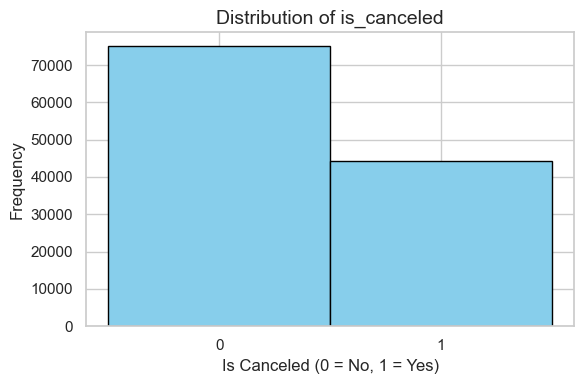

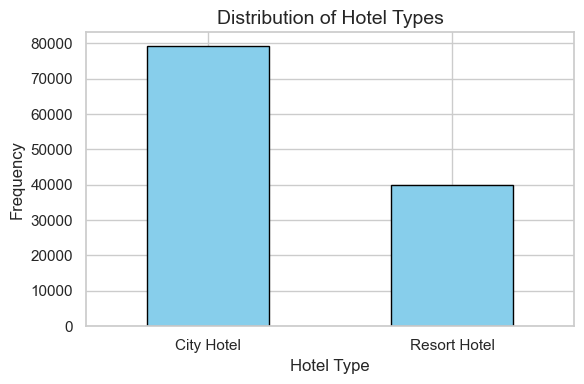

/var/folders/57/4l32p8s964dfv2l77vbvsytr0000gn/T/ipykernel_4858/2204322557.py:39: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/57/4l32p8s964dfv2l77vbvsytr0000gn/T/ipykernel_4858/2204322557.py:40: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



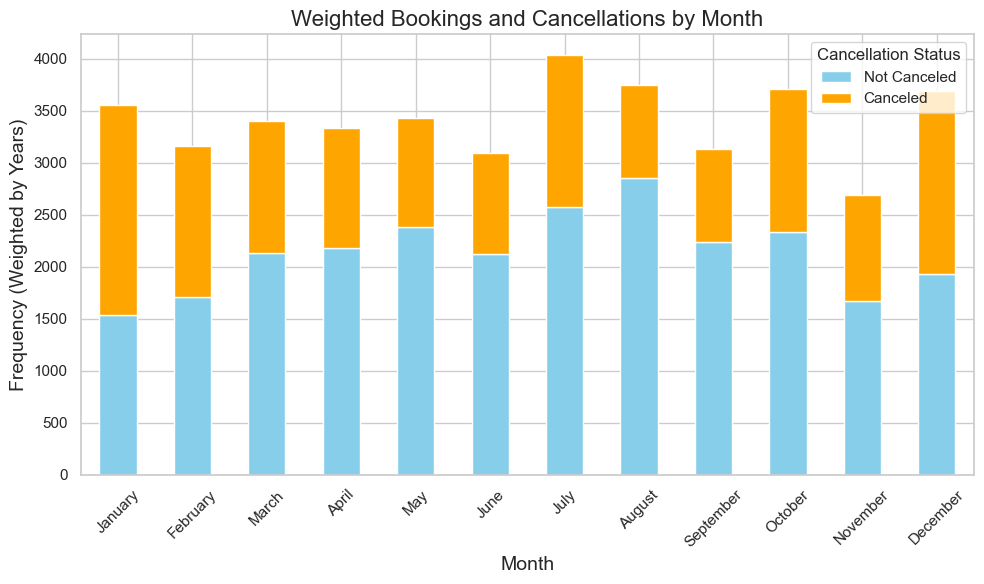

/var/folders/57/4l32p8s964dfv2l77vbvsytr0000gn/T/ipykernel_4858/2204322557.py:51: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/57/4l32p8s964dfv2l77vbvsytr0000gn/T/ipykernel_4858/2204322557.py:52: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



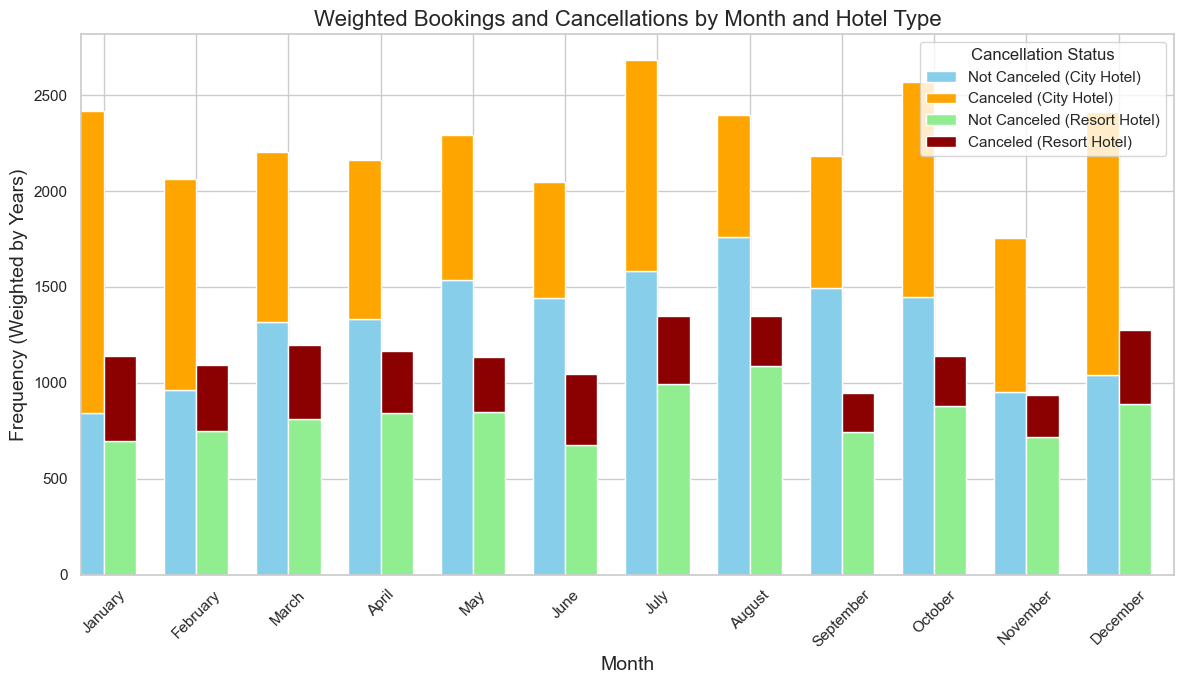

/var/folders/57/4l32p8s964dfv2l77vbvsytr0000gn/T/ipykernel_4858/2204322557.py:72: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/57/4l32p8s964dfv2l77vbvsytr0000gn/T/ipykernel_4858/2204322557.py:73: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



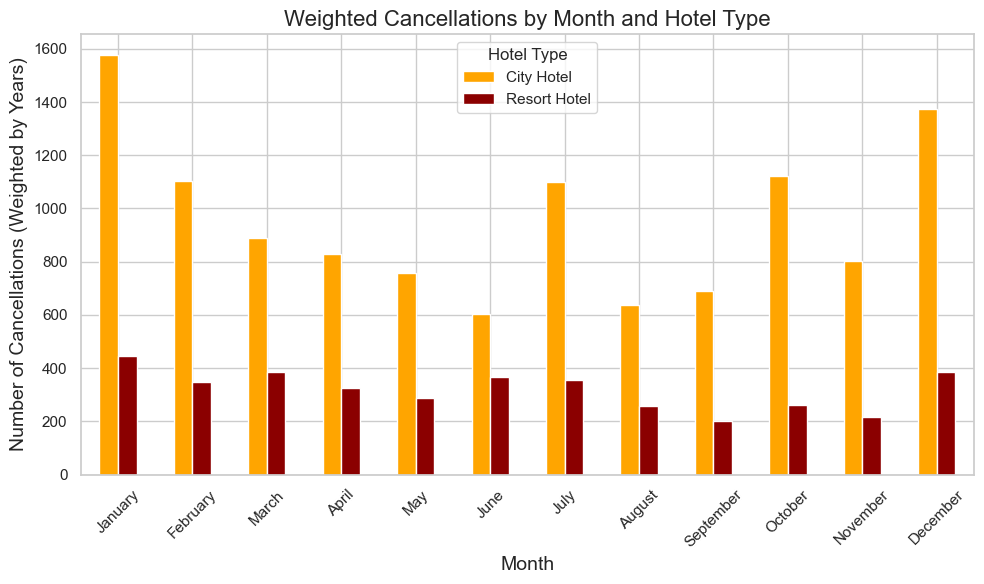

/var/folders/57/4l32p8s964dfv2l77vbvsytr0000gn/T/ipykernel_4858/2204322557.py:85: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



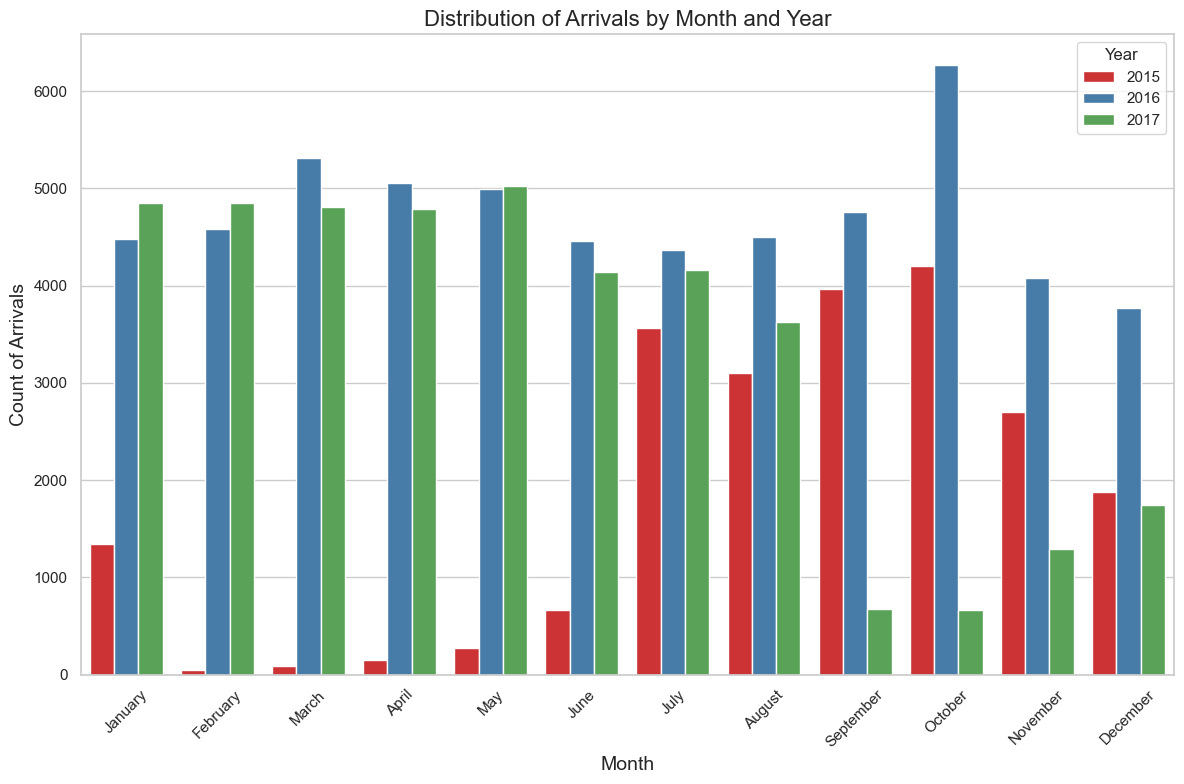

/var/folders/57/4l32p8s964dfv2l77vbvsytr0000gn/T/ipykernel_4858/2204322557.py:110: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




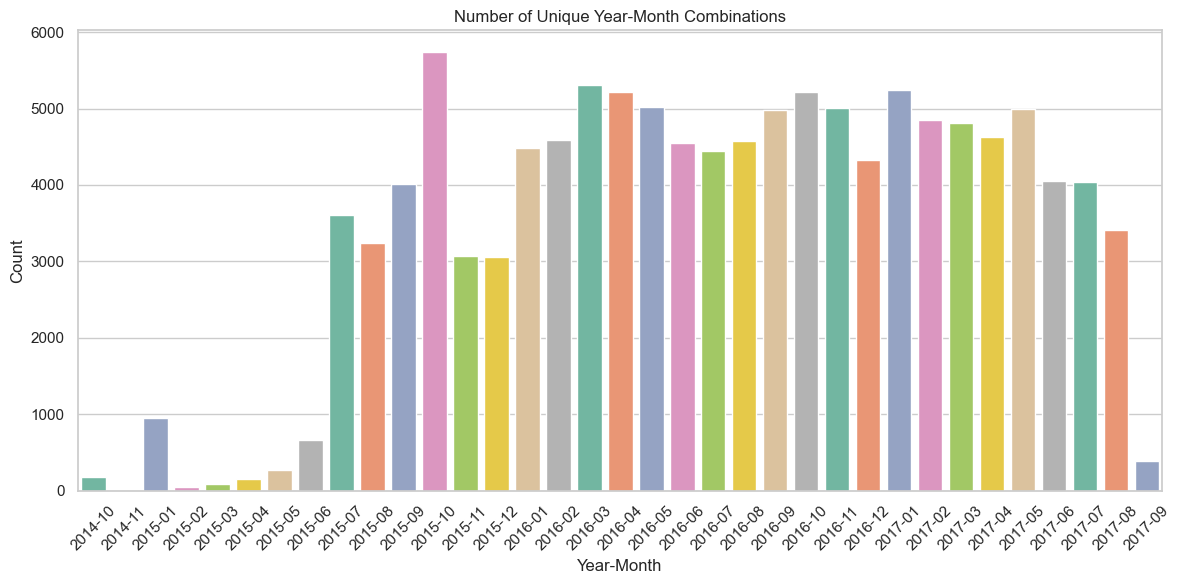

(119206, 33)
Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'year', 'year_count',
       'year_month'],
      dtype='object')


In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df['year'] = df['reservation_status_date'].dt.year
df['arrival_date_month'] = df['reservation_status_date'].dt.strftime('%B')  # Extract full month name

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=month_order, ordered=True)

years_per_month = df.groupby('arrival_date_month')['year'].nunique().reset_index()
years_per_month.columns = ['arrival_date_month', 'year_count']

df = df.merge(years_per_month, on='arrival_date_month', how='left')

### Graph 1: Distribution of 'is_canceled' ###
plt.figure(figsize=(6, 4))
df['is_canceled'].hist(bins=[-0.5, 0.5, 1.5], color='skyblue', edgecolor='black', align='mid')
plt.title('Distribution of is_canceled', fontsize=14)
plt.xlabel('Is Canceled (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks([0, 1])
plt.tight_layout()
plt.show()

### Graph 2: Distribution of hotel type ###
plt.figure(figsize=(6, 4))
df['hotel'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Hotel Types', fontsize=14)
plt.xlabel('Hotel Type', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Graph 3: Bookings and cancellations by month (weighted by years)
cancellation_counts = df.groupby(['arrival_date_month', 'is_canceled']).size().unstack(fill_value=0)
cancellation_counts = cancellation_counts.div(df.groupby('arrival_date_month')['year_count'].mean(), axis=0)  # Weight by year count
cancellation_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'orange'])
plt.title('Weighted Bookings and Cancellations by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Frequency (Weighted by Years)', fontsize=14)
plt.legend(['Not Canceled', 'Canceled'], title='Cancellation Status')
plt.tight_layout()
plt.show()

### Graph 4: Bookings and cancellations by month and hotel type (weighted by years)
cancellation_by_hotel = df.groupby(['arrival_date_month', 'hotel', 'is_canceled']).size().unstack(fill_value=0)
cancellation_by_hotel = cancellation_by_hotel.div(df.groupby('arrival_date_month')['year_count'].mean(), axis=0)

city_hotel = cancellation_by_hotel.xs('City Hotel', level='hotel')
resort_hotel = cancellation_by_hotel.xs('Resort Hotel', level='hotel')

fig, ax = plt.subplots(figsize=(12, 7))
bar_width = 0.35
city_hotel.plot(kind='bar', stacked=True, ax=ax, width=bar_width, position=1, color=['skyblue', 'orange'])
resort_hotel.plot(kind='bar', stacked=True, ax=ax, width=bar_width, position=0, color=['lightgreen', 'darkred'])
plt.title('Weighted Bookings and Cancellations by Month and Hotel Type', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Frequency (Weighted by Years)', fontsize=14)
plt.legend(['Not Canceled (City Hotel)', 'Canceled (City Hotel)', 
            'Not Canceled (Resort Hotel)', 'Canceled (Resort Hotel)'], title='Cancellation Status')
plt.tight_layout()
plt.show()

### Graph 5: Cancellations by month and hotel type (weighted by years) ###
canceled_data = df[df['is_canceled'] == 1]
cancellation_by_month_hotel = canceled_data.groupby(['arrival_date_month', 'hotel']).size().unstack(fill_value=0)
cancellation_by_month_hotel = cancellation_by_month_hotel.div(df.groupby('arrival_date_month')['year_count'].mean(), axis=0)

cancellation_by_month_hotel.plot(kind='bar', color=['orange', 'darkred'], figsize=(10, 6))
plt.title('Weighted Cancellations by Month and Hotel Type', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Number of Cancellations (Weighted by Years)', fontsize=14)
plt.legend(title='Hotel Type')
plt.tight_layout()
plt.show()

# Graph 6: Distribution of arrivals by arrival_date_month & arrival_date_year ###
arrival_grouped = df.groupby(['arrival_date_year', 'arrival_date_month']).size().reset_index(name='count')

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(12, 8))

sns.barplot(x='arrival_date_month', y='count', hue='arrival_date_year', data=arrival_grouped, 
            palette='Set1', order=month_order)
plt.title('Distribution of Arrivals by Month and Year', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Count of Arrivals', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Year', loc='upper right')

plt.tight_layout()
plt.show()

# Graph 6: Year-month unique counts ###
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df['year_month'] = df['reservation_status_date'].dt.to_period('M').astype(str)

year_month_counts = df['year_month'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=year_month_counts.index, y=year_month_counts.values, palette='Set2')
plt.title('Number of Unique Year-Month Combinations')
plt.xlabel('Year-Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


print(df.shape)
print(df.columns)


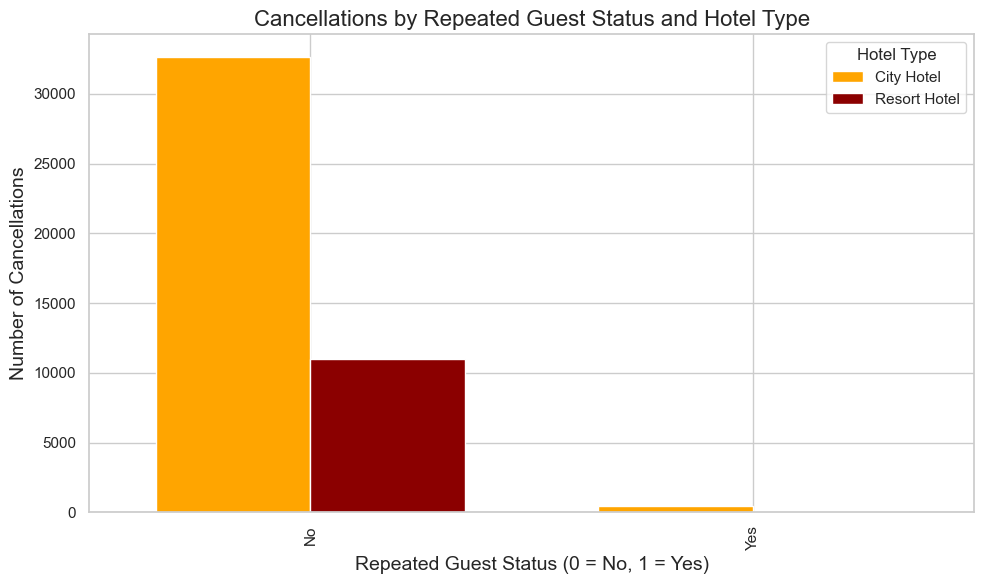

/var/folders/57/4l32p8s964dfv2l77vbvsytr0000gn/T/ipykernel_4858/588771952.py:48: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/57/4l32p8s964dfv2l77vbvsytr0000gn/T/ipykernel_4858/588771952.py:49: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/57/4l32p8s964dfv2l77vbvsytr0000gn/T/ipykernel_4858/588771952.py:52: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed

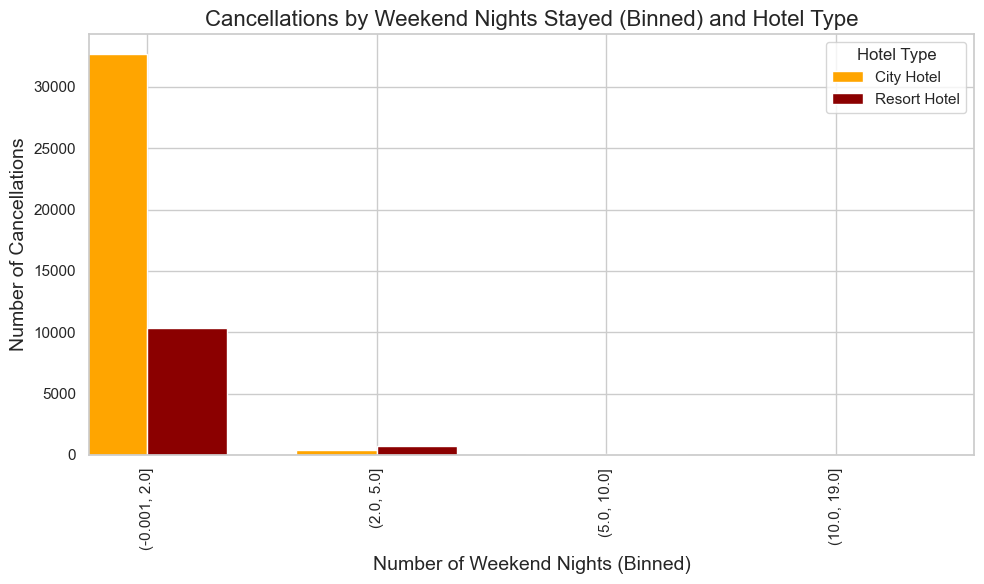

/var/folders/57/4l32p8s964dfv2l77vbvsytr0000gn/T/ipykernel_4858/588771952.py:61: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



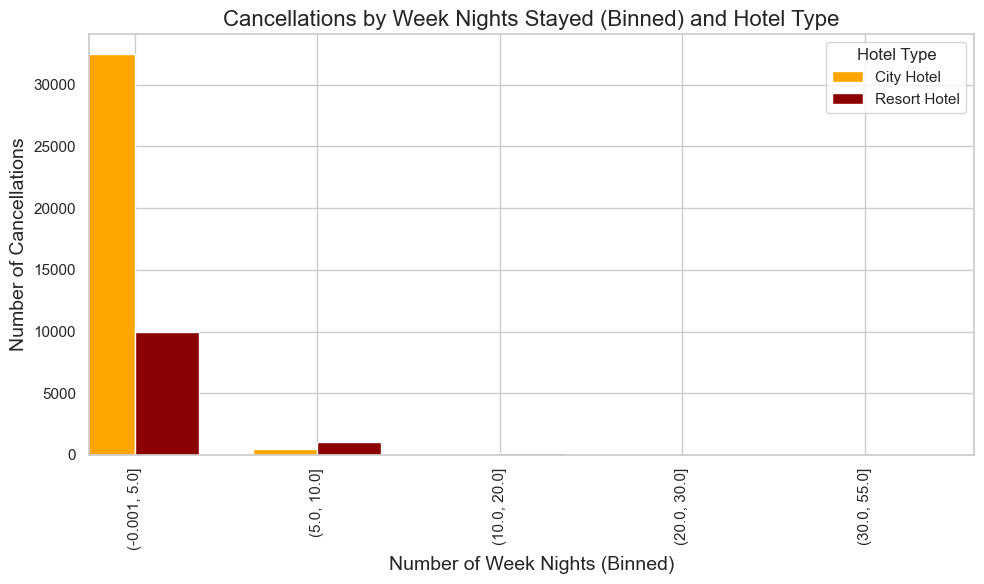

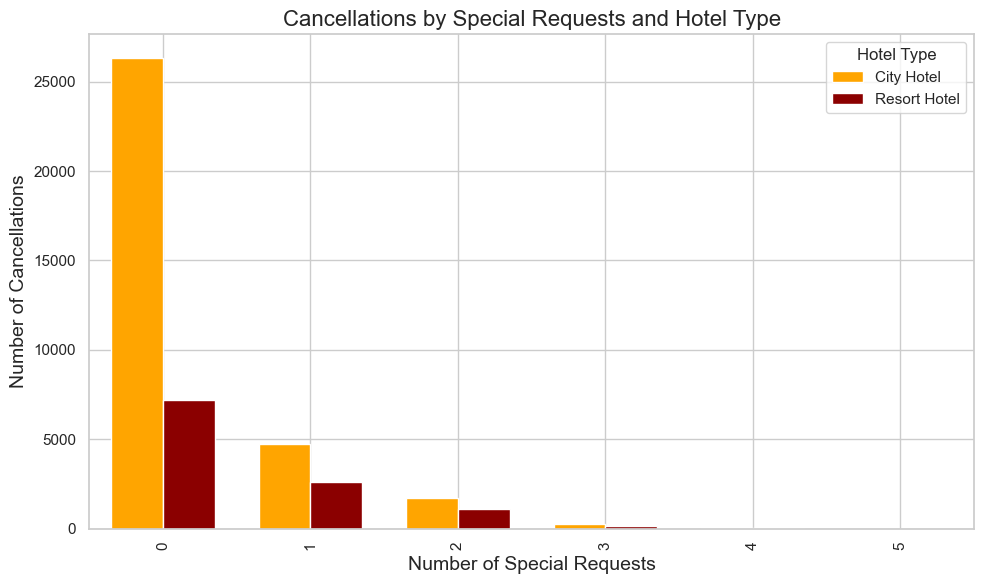

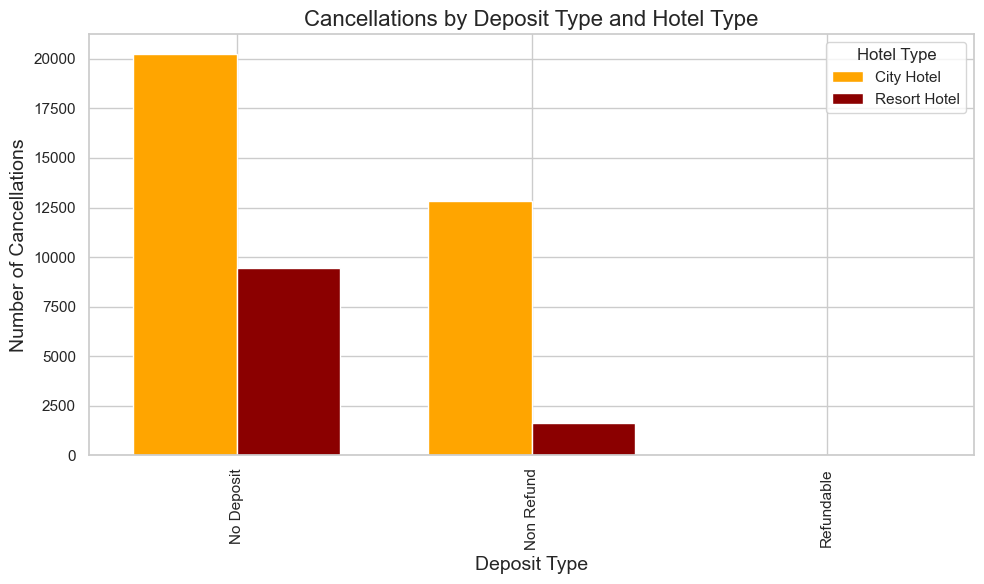

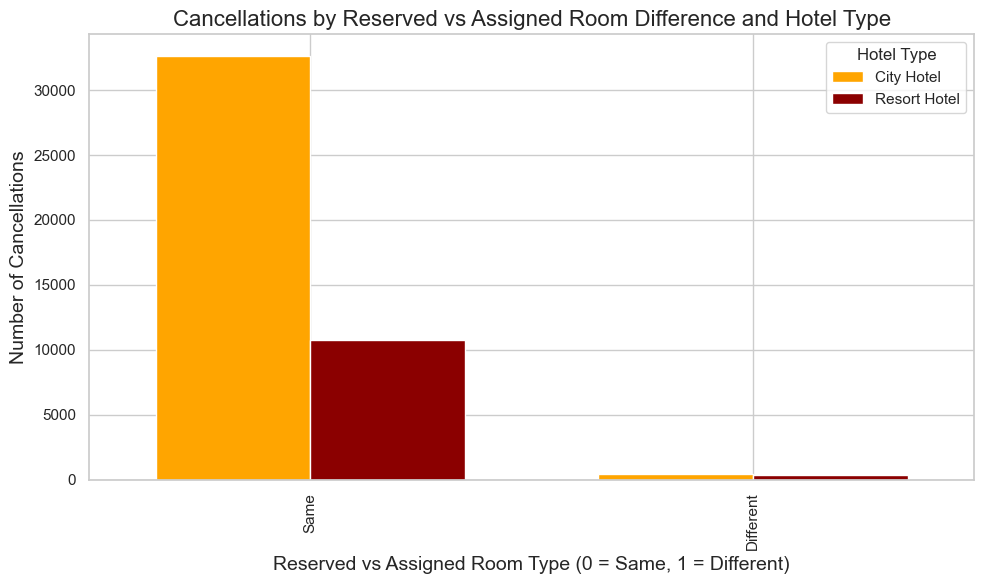

(119206, 34)
Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'year', 'year_count',
       'year_month', 'differs_in_reserved_assigned'],
      dtype='object')


In [79]:
import seaborn as sns

sns.set(style="whitegrid")

canceled_df = df[df['is_canceled'] == 1]

# Define a function for side-by-side bar plots
def plot_side_by_side_bars(data, xlabel, ylabel, title, xticks=None, xlim=None):
    fig, ax = plt.subplots(figsize=(10, 6))
    bar_width = 0.35

    city_hotel = data.loc['City Hotel']
    resort_hotel = data.loc['Resort Hotel']

    city_hotel.plot(kind='bar', ax=ax, width=bar_width, position=1, color='orange', label="City Hotel")
    resort_hotel.plot(kind='bar', ax=ax, width=bar_width, position=0, color='darkred', label="Resort Hotel")

    if xlim:
        plt.xlim(xlim)

    if xticks is not None: 
        ax.set_xticks(range(len(xticks)))
        ax.set_xticklabels(list(xticks)) 

    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.legend(title='Hotel Type')
    plt.tight_layout()
    plt.show()

### Graph 1: Cancellation by `is_repeated_guest` by hotel type ###
cancellation_by_repeated_guest = canceled_df.groupby(['hotel', 'is_repeated_guest']).size().unstack(fill_value=0)
plot_side_by_side_bars(
    cancellation_by_repeated_guest,
    xlabel='Repeated Guest Status (0 = No, 1 = Yes)',
    ylabel='Number of Cancellations',
    title='Cancellations by Repeated Guest Status and Hotel Type',
    xticks=['No', 'Yes'],
    xlim=[-0.5, 1.5]
)

# Define bins for both stays_in_weekend_nights and stays_in_week_nights
bins_weekend = [0, 2, 5, 10, 19]
bins_week = [0, 5, 10, 20, 30, 55]

# Bin the data
canceled_df['binned_weekend'] = pd.cut(canceled_df['stays_in_weekend_nights'], bins=bins_weekend, include_lowest=True)
canceled_df['binned_week'] = pd.cut(canceled_df['stays_in_week_nights'], bins=bins_week, include_lowest=True)

### Graph 2: Cancellations by `stays_in_weekend_nights` (Binned) by hotel type
cancellation_by_weekend_binned = canceled_df.groupby(['hotel', 'binned_weekend']).size().unstack(fill_value=0)
plot_side_by_side_bars(
    cancellation_by_weekend_binned,
    xlabel='Number of Weekend Nights (Binned)',
    ylabel='Number of Cancellations',
    title='Cancellations by Weekend Nights Stayed (Binned) and Hotel Type'
)

### Graph 3: Cancellations by `stays_in_week_nights` (Binned) by hotel type
cancellation_by_week_binned = canceled_df.groupby(['hotel', 'binned_week']).size().unstack(fill_value=0)
plot_side_by_side_bars(
    cancellation_by_week_binned,
    xlabel='Number of Week Nights (Binned)',
    ylabel='Number of Cancellations',
    title='Cancellations by Week Nights Stayed (Binned) and Hotel Type'
)

### Graph 4: Cancellation by `total_of_special_requests` by hotel type ###
cancellation_by_special_requests = canceled_df.groupby(['hotel', 'total_of_special_requests']).size().unstack(fill_value=0)
plot_side_by_side_bars(
    cancellation_by_special_requests,
    xlabel='Number of Special Requests',
    ylabel='Number of Cancellations',
    title='Cancellations by Special Requests and Hotel Type',
    xlim=[-0.5, 5.5]
)

### Graph 5: Cancellation by `deposit_type` by hotel type
cancellation_by_deposit_type = canceled_df.groupby(['hotel', 'deposit_type']).size().unstack(fill_value=0)
plot_side_by_side_bars(
    cancellation_by_deposit_type,
    xlabel='Deposit Type',
    ylabel='Number of Cancellations',
    title='Cancellations by Deposit Type and Hotel Type',
    xticks=list(cancellation_by_deposit_type.columns), 
    xlim=[-0.5, 2.5]
)

### Graph 6: Cancellation by `differs_in_reserved_assigned` by hotel type
df['differs_in_reserved_assigned'] = (df['reserved_room_type'] != df['assigned_room_type']).astype(int)
canceled_df = df[df['is_canceled'] == 1]
cancellation_by_differs_in_assigned = canceled_df.groupby(['hotel', 'differs_in_reserved_assigned']).size().unstack(fill_value=0)
plot_side_by_side_bars(
    cancellation_by_differs_in_assigned,
    xlabel='Reserved vs Assigned Room Type (0 = Same, 1 = Different)',
    ylabel='Number of Cancellations',
    title='Cancellations by Reserved vs Assigned Room Difference and Hotel Type',
    xticks=['Same', 'Different'],
    xlim=[-0.5, 1.5]
)


print(df.shape)
print(df.columns)

              hotel  is_canceled  lead_time  arrival_date_year  \
14962  Resort Hotel            0        195               2017   

      arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
14962              March                        10                          5   

       stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
14962                        4                     6       2  ...   

         customer_type   adr required_car_parking_spaces  \
14962  Transient-Party -6.38                           0   

      total_of_special_requests reservation_status reservation_status_date  \
14962                         0          Check-Out              2017-03-15   

       year  year_count  year_month differs_in_reserved_assigned  
14962  2017           3     2017-03                            1  

[1 rows x 34 columns]
(119205, 34)


/var/folders/57/4l32p8s964dfv2l77vbvsytr0000gn/T/ipykernel_4858/1857299137.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




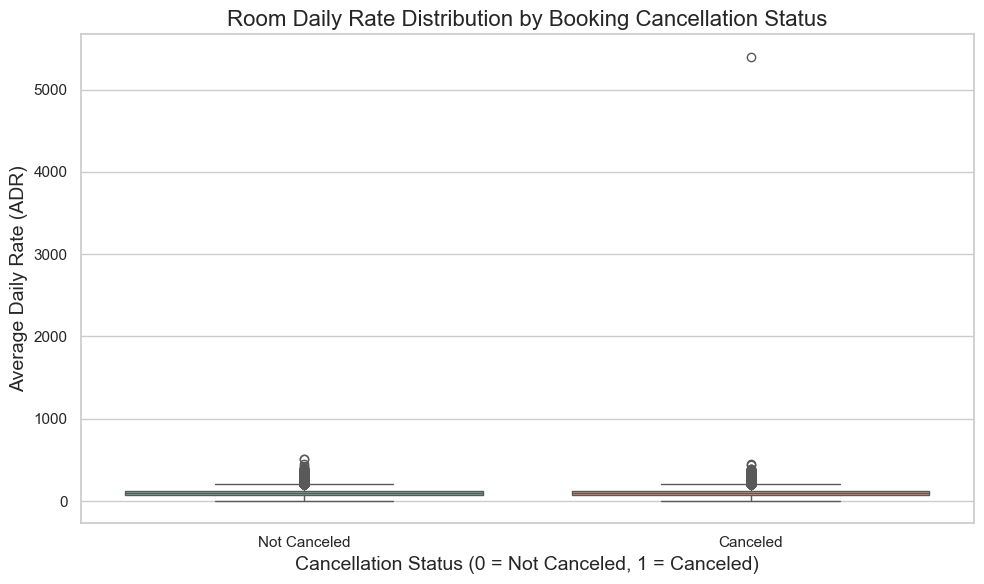

/var/folders/57/4l32p8s964dfv2l77vbvsytr0000gn/T/ipykernel_4858/1857299137.py:35: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




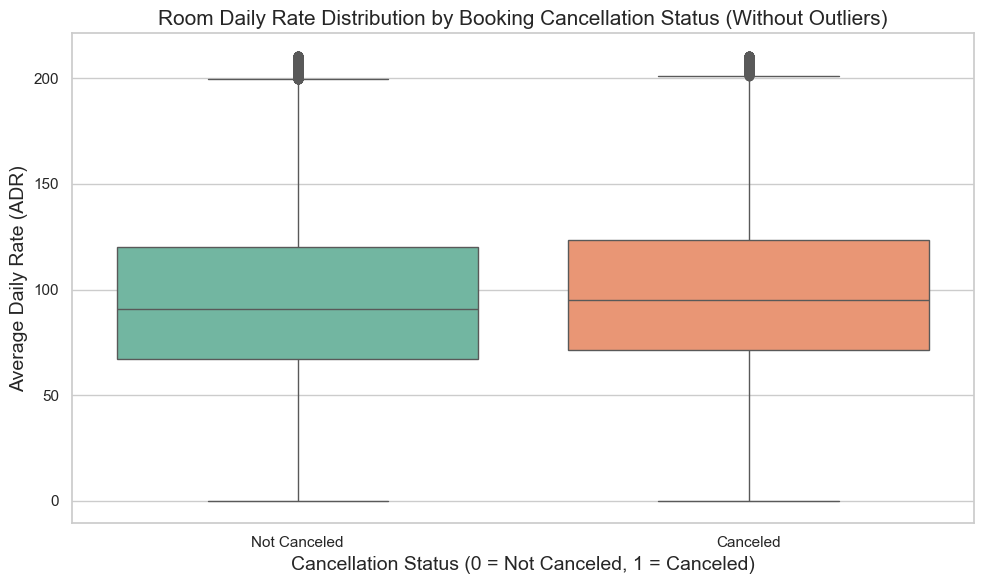

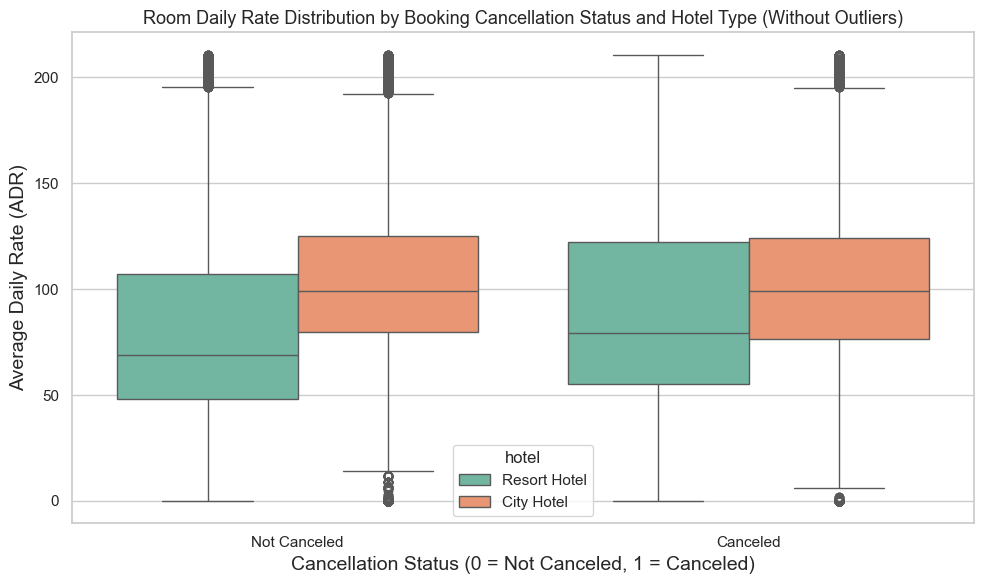

(119205, 34)
Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'year', 'year_count',
       'year_month', 'differs_in_reserved_assigned'],
      dtype='object')


In [80]:
# Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
df['adr'].describe()
# why is there negative numbers?
negative_adr = df[df['adr'] < 0]
print(negative_adr)
# only 1 row, and we don't know the sum of all lodging transactions so we can't figure out exactly why
# therefore we drop this row
# drop rows where 'adr' is negative
df = df[df['adr'] >= 0]
print(df.shape)

### Graph 1: Cancellation by room raily rate ###
plt.figure(figsize=(10, 6))
sns.boxplot(x="is_canceled", y="adr", data=df, palette="Set2")

plt.title("Room Daily Rate Distribution by Booking Cancellation Status", fontsize=16)
plt.xlabel("Cancellation Status (0 = Not Canceled, 1 = Canceled)", fontsize=14)
plt.ylabel("Average Daily Rate (ADR)", fontsize=14)
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])

plt.tight_layout()
plt.show()

### Graph 2: Cancellation by room daily rate (but took care of outliers in adr) ###
Q1 = df['adr'].quantile(0.25)
Q3 = df['adr'].quantile(0.75)
IQR = Q3 - Q1

# following the 1.5IQR rule
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers = df[(df['adr'] >= lower_bound) & (df['adr'] <= upper_bound)]

plt.figure(figsize=(10, 6))
sns.boxplot(x="is_canceled", y="adr", data=df_no_outliers, palette="Set2")
plt.title("Room Daily Rate Distribution by Booking Cancellation Status (Without Outliers)", fontsize=15)
plt.xlabel("Cancellation Status (0 = Not Canceled, 1 = Canceled)", fontsize=14)
plt.ylabel("Average Daily Rate (ADR)", fontsize=14)
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])
plt.tight_layout()
plt.show()

### Graph 3: Cancellation by room daily rate and hotel type (took care of outliers) ###
plt.figure(figsize=(10, 6))
sns.boxplot(x="is_canceled", y="adr", hue="hotel", data=df_no_outliers, palette="Set2")

plt.title("Room Daily Rate Distribution by Booking Cancellation Status and Hotel Type (Without Outliers)", fontsize=13)
plt.xlabel("Cancellation Status (0 = Not Canceled, 1 = Canceled)", fontsize=14)
plt.ylabel("Average Daily Rate (ADR)", fontsize=14)
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])
plt.tight_layout()
plt.show()

print(df.shape)
print(df.columns)

/var/folders/57/4l32p8s964dfv2l77vbvsytr0000gn/T/ipykernel_4858/1242731515.py:11: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.




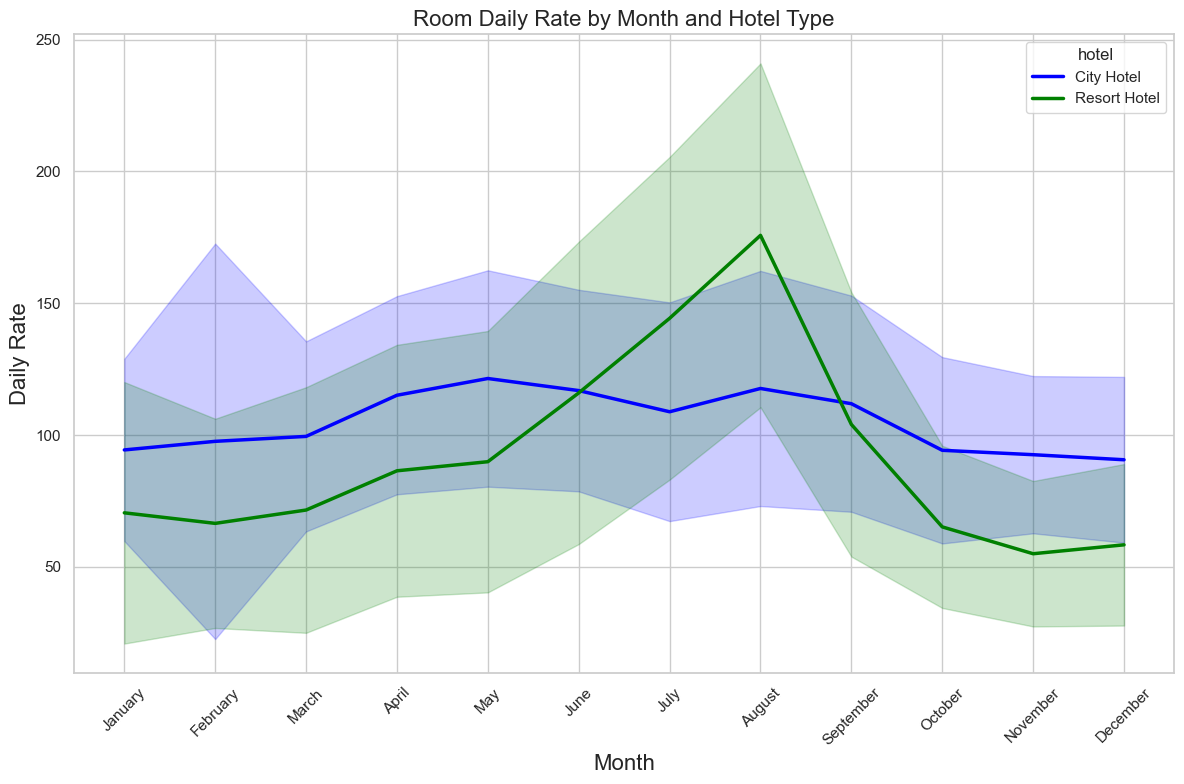

/var/folders/57/4l32p8s964dfv2l77vbvsytr0000gn/T/ipykernel_4858/1242731515.py:38: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.




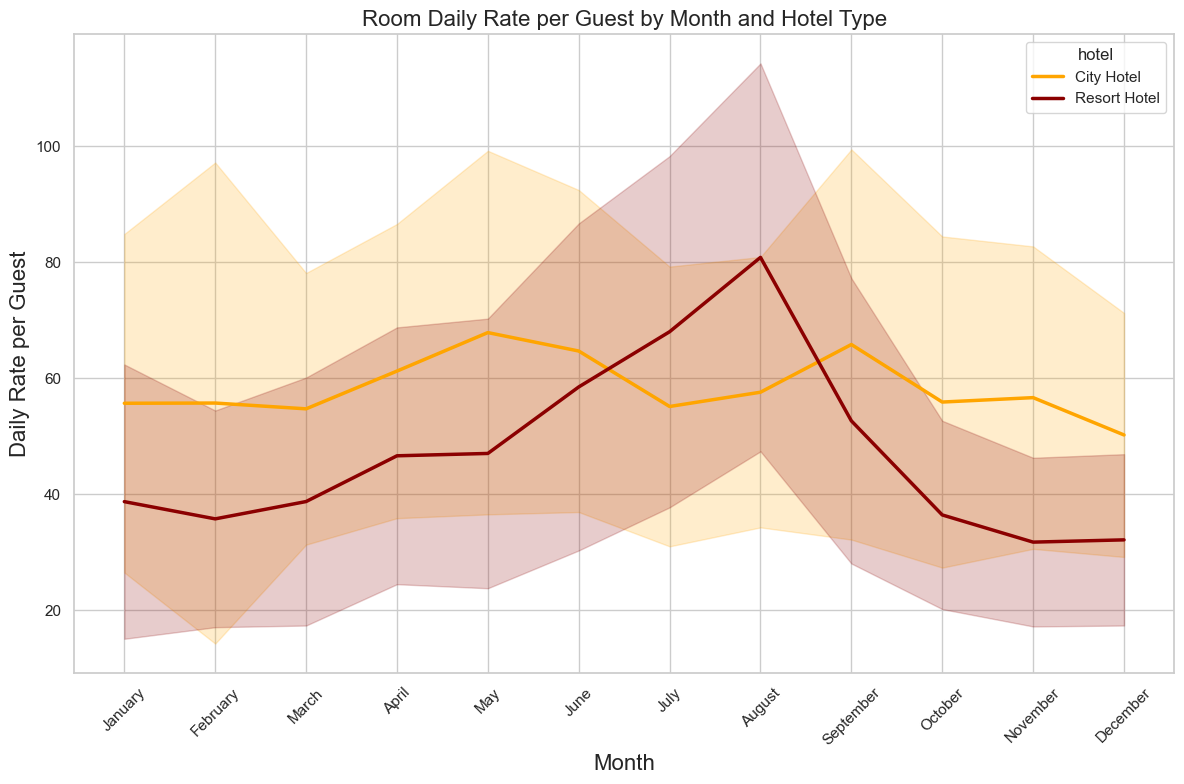

/var/folders/57/4l32p8s964dfv2l77vbvsytr0000gn/T/ipykernel_4858/1242731515.py:53: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



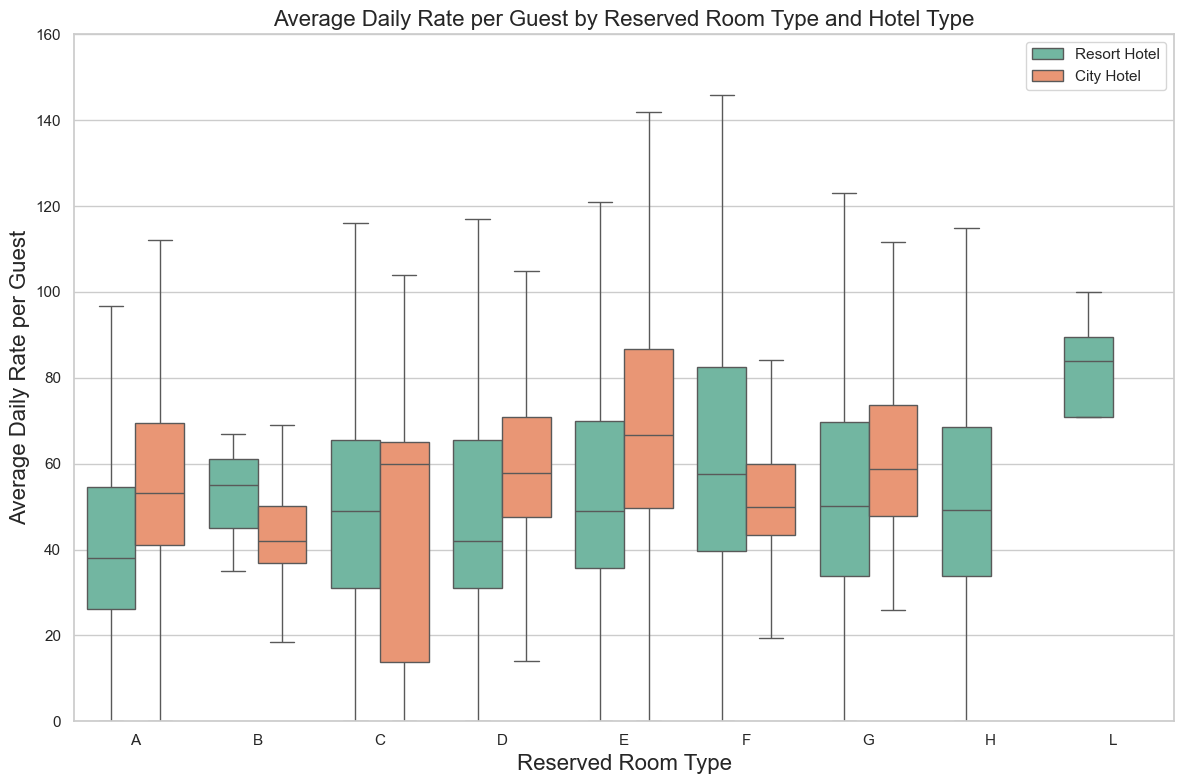

In [81]:
### Graph 1: Room daily rate by month and hotel type
room_prices_monthly = df[["hotel", "arrival_date_month", "adr"]].sort_values("arrival_date_month")

month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]

room_prices_monthly["arrival_date_month"] = pd.Categorical(room_prices_monthly["arrival_date_month"], 
                                                           categories=month_order, ordered=True)

plt.figure(figsize=(12, 8))
sns.lineplot(x="arrival_date_month", y="adr", hue="hotel", data=room_prices_monthly, 
             hue_order=["City Hotel", "Resort Hotel"], ci="sd", size="hotel", sizes=(2.5, 2.5), 
             palette={"City Hotel": "blue", "Resort Hotel": "green"}) 

plt.title("Room Daily Rate by Month and Hotel Type", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Daily Rate", fontsize=16)
plt.tight_layout()
plt.show()

### Graph 2: Room daily rate per guest by month and hotel type ###
df['total_guests'] = df['adults'] + df['children']
df['total_guests'] = df['total_guests'].replace(0, 1) 

df['adr_pp'] = df['adr'] / df['total_guests']

room_prices_pp_monthly = df[["hotel", "arrival_date_month", "adr_pp"]].sort_values("arrival_date_month")

month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]

room_prices_pp_monthly["arrival_date_month"] = pd.Categorical(room_prices_pp_monthly["arrival_date_month"], 
                                                           categories=month_order, ordered=True)

plt.figure(figsize=(12, 8))

sns.lineplot(x="arrival_date_month", y="adr_pp", hue="hotel", data=room_prices_pp_monthly, 
             hue_order=["City Hotel", "Resort Hotel"], ci="sd", size="hotel", sizes=(2.5, 2.5), 
             palette={"City Hotel": "orange", "Resort Hotel": "darkred"})  

plt.title("Room Daily Rate per Guest by Month and Hotel Type", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Daily Rate per Guest", fontsize=16)

plt.tight_layout()
plt.show()

### Graph 3: Room daily rate per guest by reserved room type and hotel type (only those not cancelled) ###
non_canceled_df = df[df['is_canceled'] == 0]

non_canceled_df['adr_pp'] = non_canceled_df['adr'] / (non_canceled_df['adults'] + non_canceled_df['children'])

room_prices = non_canceled_df[["hotel", "reserved_room_type", "adr_pp"]].sort_values("reserved_room_type")

plt.figure(figsize=(12, 8))
sns.boxplot(x="reserved_room_type",
            y="adr_pp",
            hue="hotel",
            data=room_prices,
            hue_order=["Resort Hotel", "City Hotel"],
            palette='Set2',
            fliersize=0)

plt.title("Average Daily Rate per Guest by Reserved Room Type and Hotel Type", fontsize=16)
plt.xlabel("Reserved Room Type", fontsize=16)
plt.ylabel("Average Daily Rate per Guest", fontsize=16)
plt.legend(loc="upper right")
plt.ylim(0, 160)

plt.tight_layout()
plt.show()


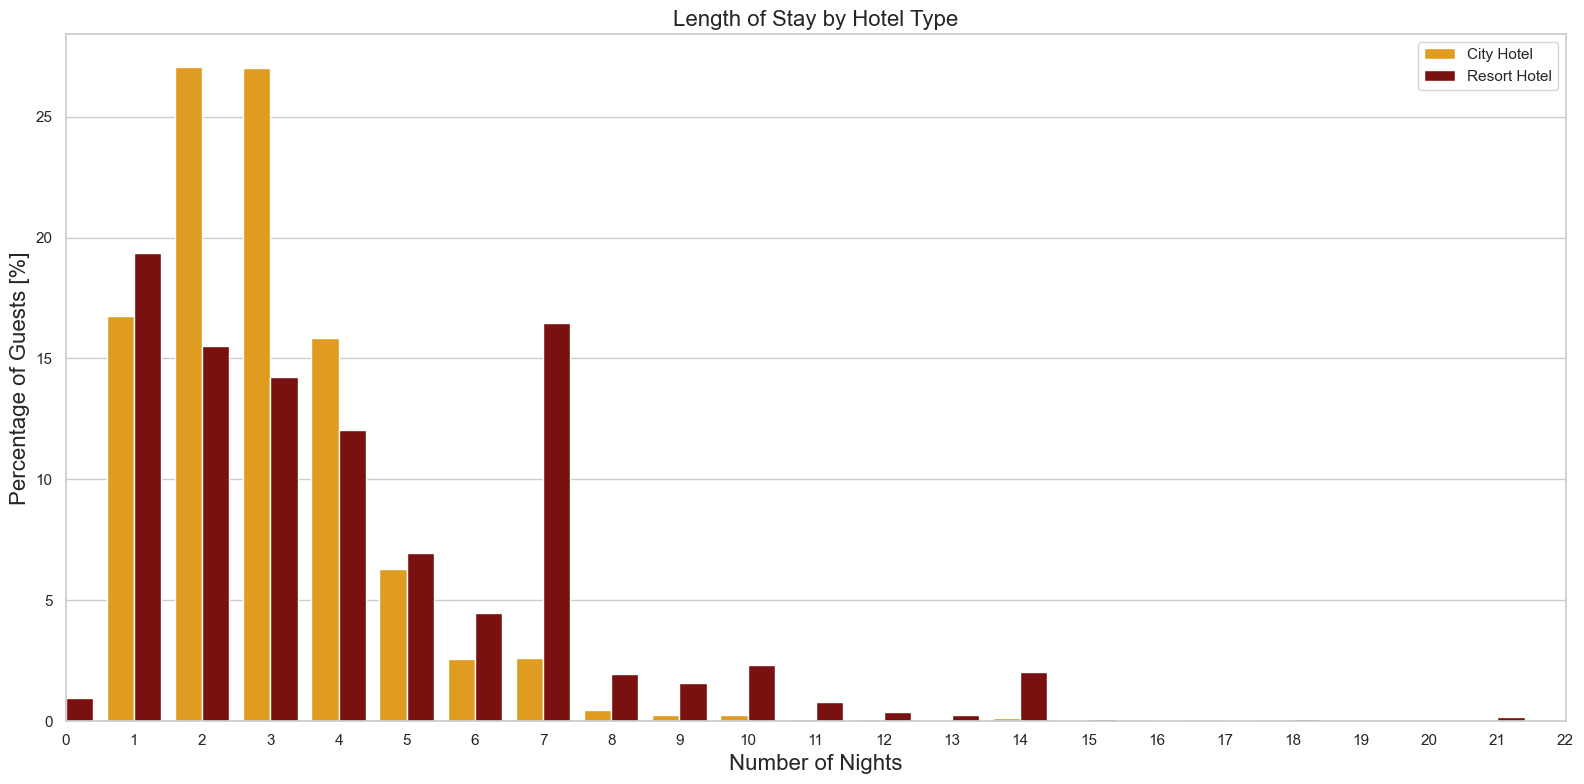

'year_count' successfully added.


/var/folders/57/4l32p8s964dfv2l77vbvsytr0000gn/T/ipykernel_4858/2939645823.py:50: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



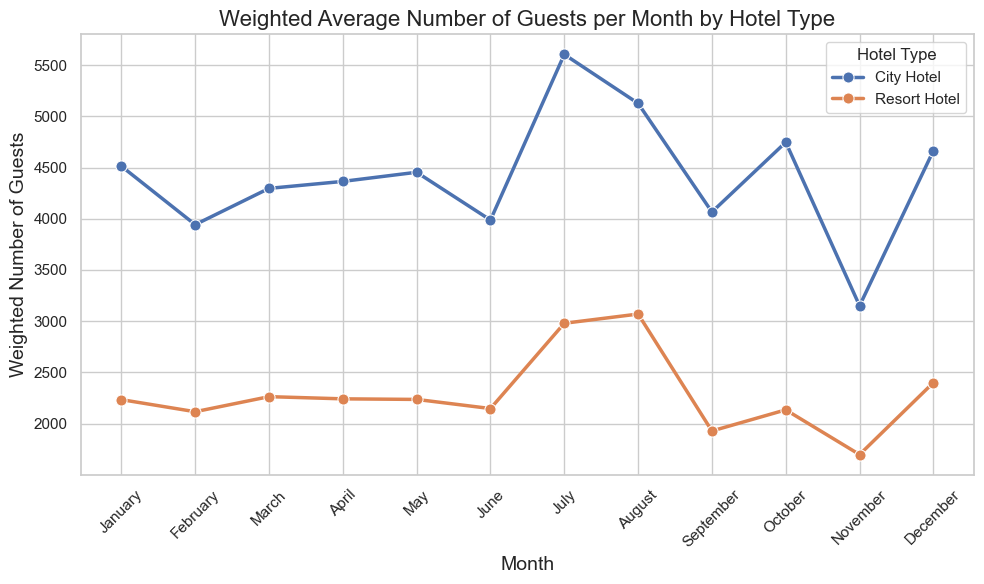

(119205, 40)
Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'year', 'year_count_x',
       'year_month', 'differs_in_reserved_assigned', 'total_guests', 'adr_pp',
       'total_nights', 'year_count_y', 'year_count', 'weighted_guests'],
      dtype='object')
[3 2]


In [83]:
import plotly.express as px

### Graph 1: Length of stay by hotel type ###
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

stay_data = df.groupby(['hotel', 'total_nights']).size().reset_index(name='guest_count')
stay_data['guest_percentage'] = stay_data.groupby('hotel')['guest_count'].transform(lambda x: x / x.sum() * 100)

plt.figure(figsize=(16, 8))
sns.barplot(x="total_nights", y="guest_percentage", hue="hotel", data=stay_data, 
            palette={"City Hotel": "orange", "Resort Hotel": "darkred"})

plt.title("Length of Stay by Hotel Type", fontsize=16)
plt.xlabel("Number of Nights", fontsize=16)
plt.ylabel("Percentage of Guests [%]", fontsize=16)
plt.legend(loc="upper right")
plt.xlim(0, 22)  
plt.tight_layout()
plt.show()

### Graph 2: Where do guests come from? ###
df['total_guests'] = df['adults'] + df['children']
df['total_guests'] = df['total_guests'].replace(0, 1)

country_guests = df.groupby('country')['total_guests'].sum().reset_index()

top_countries = country_guests.sort_values('total_guests', ascending=False).head(10)

fig = px.bar(top_countries,
             x='country',
             y='total_guests',
             title='Top 10 Countries by Number of Guests',
             labels={'total_guests': 'Number of Guests', 'country': 'Country'},
             template="seaborn",
             color='total_guests', 
             color_continuous_scale=px.colors.sequential.Viridis)
fig.show()

### Graph 3: Weighted guests by month and hotel type ###
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

df['year'] = df['reservation_status_date'].dt.year
df['arrival_date_month'] = df['reservation_status_date'].dt.strftime('%B')  # Full month name

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=month_order, ordered=True)

years_per_month = df.groupby('arrival_date_month')['year'].nunique().reset_index()
years_per_month.columns = ['arrival_date_month', 'year_count']

df = df.merge(years_per_month, on='arrival_date_month', how='left')

if 'year_count' in df.columns:
    print("'year_count' successfully added.")
else:
    print("'year_count' column is missing.")

df['total_guests'] = df['adults'] + df['children']
df['total_guests'] = df['total_guests'].replace(0, 1)

df['weighted_guests'] = df['total_guests'] / df['year_count']

grouped_data = df.groupby(['arrival_date_month', 'hotel'], observed=True)['weighted_guests'].sum().reset_index()

if not grouped_data.empty:
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='arrival_date_month', y='weighted_guests', hue='hotel', data=grouped_data, 
                 marker="o", markersize=8, hue_order=["City Hotel", "Resort Hotel"], linewidth=2.5)

    plt.title('Weighted Average Number of Guests per Month by Hotel Type', fontsize=16)
    plt.xlabel('Month', fontsize=14)
    plt.xticks(rotation=45)
    plt.ylabel('Weighted Number of Guests', fontsize=14)
    plt.legend(title="Hotel Type", loc="upper right")
    plt.tight_layout()
    plt.show()
else:
    print("No data available for plotting.")

### Graph 4: Bookings by market segment (including cancelled bookings)
segments=df["market_segment"].value_counts()

fig = px.pie(segments,
             values=segments.values,
             names=segments.index,
             title="Bookings per market segment",
             template="seaborn")
fig.update_traces(rotation=-90, textinfo="percent+label")
fig.show()

print(df.shape)
print(df.columns)
print(df['year_count'].unique())


In [84]:
df = df.drop(columns=['year_count_x', 'year_count_y'], errors='ignore')
print(df.shape)
print(df.columns)

(119205, 38)
Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'year', 'year_month',
       'differs_in_reserved_assigned', 'total_guests', 'adr_pp',
       'total_nights', 'year_count', 'weighted_guests'],
      dtype='object')


In [85]:
### Preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.feature_selection import f_classif, mutual_info_classif

# What features should we use?
df_copy = df.copy()
df_encoded = pd.get_dummies(df_copy, columns=['hotel', 'meal'], drop_first=True)
df_numeric = df_encoded.select_dtypes(include=[float, int])
correlation = df_numeric.corr()['is_canceled'].abs().sort_values(ascending=False)
print(correlation)
# But remember we only kept numerical features here

df.drop(columns=['year', 'year_count'], inplace=True) # No need in prediction

print(df.shape)
print(df.columns)


is_canceled                       1.000000
lead_time                         0.292937
differs_in_reserved_assigned      0.246750
total_of_special_requests         0.234931
required_car_parking_spaces       0.195698
booking_changes                   0.144808
year                              0.117053
previous_cancellations            0.110147
is_repeated_guest                 0.083715
weighted_guests                   0.064999
adults                            0.058157
previous_bookings_not_canceled    0.057355
year_count                        0.056752
days_in_waiting_list              0.054308
total_guests                      0.049879
adr                               0.046545
babies                            0.032567
stays_in_week_nights              0.025561
total_nights                      0.018579
adr_pp                            0.017858
arrival_date_year                 0.016702
arrival_date_week_number          0.008291
arrival_date_day_of_month         0.005910
children   

In [86]:
# Split
# Define numerical and categorical feature sets
num = ["lead_time", "arrival_date_week_number", "arrival_date_day_of_month",
       "stays_in_weekend_nights", "stays_in_week_nights", "adults", "children",
       "babies", "is_repeated_guest", "previous_cancellations",
       "previous_bookings_not_canceled", "booking_changes", "days_in_waiting_list", "adr",
       "required_car_parking_spaces", "total_of_special_requests", "total_guests", "adr_pp", "total_nights"]

cat = ["hotel", "arrival_date_month", "meal", "country", "market_segment",
       "distribution_channel", "reserved_room_type", "assigned_room_type", "deposit_type", "customer_type"]

features = num + cat
X = df.drop(columns=["is_canceled", "reservation_status", "reservation_status_date", "year_month", "weighted_guests"])[features]
y = df["is_canceled"]

random_state = 42
X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=0.6, random_state=random_state)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, train_size=0.5, random_state=random_state)

num_features = num  
cat_features = cat  

# Preprocessor pipeline: Handle missing values in 'country' with SimpleImputer, and then OneHotEncoder for categorical features, StandardScaler for numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),  # Impute missing values in categorical columns
            ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))  # OneHotEncoder after imputing missing values
        ]), cat_features),
        ('std', StandardScaler(), num_features)
    ]
)

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

X_train_prep = pipeline.fit_transform(X_train)
X_val_prep = pipeline.transform(X_val)
X_test_prep = pipeline.transform(X_test)

print("Original training set shape:", X_train.shape)
print("Preprocessed training set shape:", X_train_prep.shape)
print(X_train_prep[:5])

print(df.shape)
print(df.columns)

Original training set shape: (71523, 29)
Preprocessed training set shape: (71523, 240)
[[ 1.          0.          0.         ... -1.33520413  0.81342318
  -0.55758724]
 [ 0.          1.          0.         ...  0.04980559 -0.20337536
  -0.94761474]
 [ 1.          0.          0.         ... -1.33520413  3.87055256
  -0.55758724]
 [ 0.          1.          0.         ... -1.33520413 -1.09559924
   1.39255027]
 [ 1.          0.          0.         ...  0.04980559 -0.33805066
  -0.94761474]]
(119205, 36)
Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type

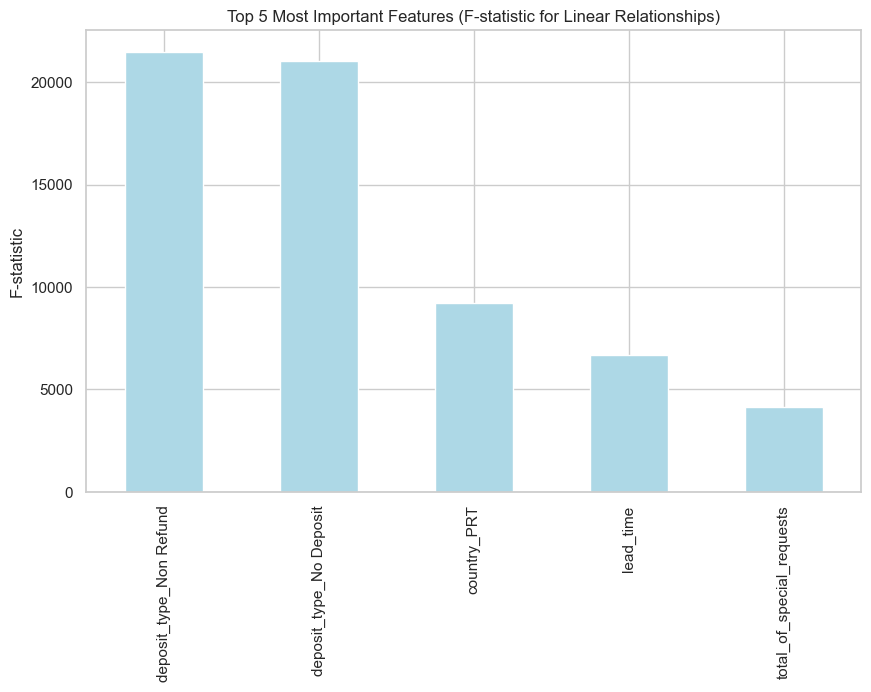

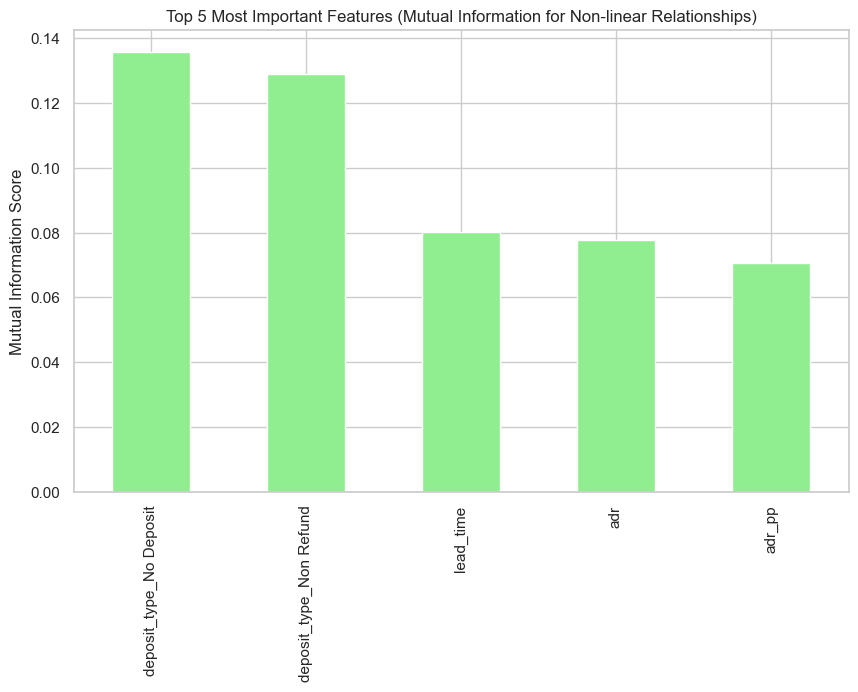

Top 5 features by F-statistic (linear):
 deposit_type_Non Refund      21469.577319
deposit_type_No Deposit      21031.174816
country_PRT                   9229.666919
lead_time                     6703.432527
total_of_special_requests     4128.517244
dtype: float64

Top 5 features by Mutual Information (non-linear):
 deposit_type_No Deposit    0.135704
deposit_type_Non Refund    0.128905
lead_time                  0.080099
adr                        0.077574
adr_pp                     0.070565
dtype: float64


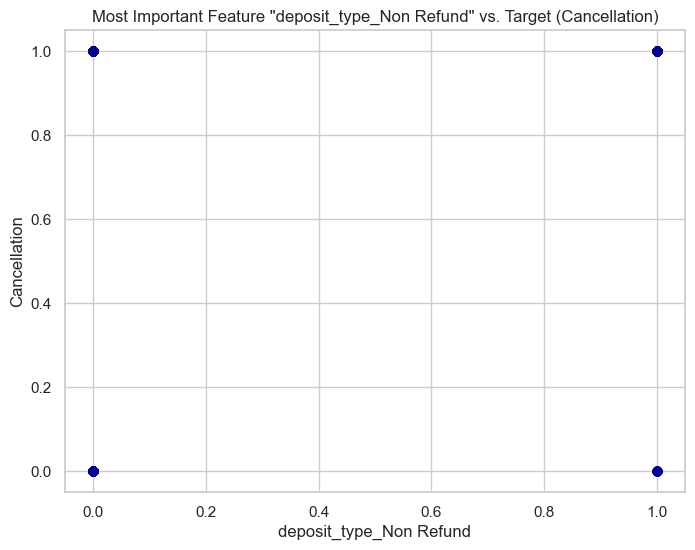

(119205, 36)
Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'year_month',
       'differs_in_reserved_assigned', 'total_guests', 'adr_pp',
       'total_nights', 'weighted_guests'],
      dtype='object')


In [88]:
# After the pipeline fit, get the feature names from both the onehot and numerical features
onehot_feature_names = preprocessor.named_transformers_['onehot']['onehot'].get_feature_names_out(cat_features)
final_feature_names = list(onehot_feature_names) + num_features

# f_classif (for linear relationships)
f_statistic, p_values = f_classif(X_train_prep, y_train)
f_stat_series = pd.Series(f_statistic, index=final_feature_names).sort_values(ascending=False)

# mutual_info_classif (for non-linear relationships)
mi_classif = mutual_info_classif(X_train_prep, y_train, random_state=42)
mi_classif_series = pd.Series(mi_classif, index=final_feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
f_stat_series.head(5).plot(kind='bar', color='lightblue')
plt.title('Top 5 Most Important Features (F-statistic for Linear Relationships)')
plt.ylabel('F-statistic')
plt.show()

plt.figure(figsize=(10, 6))
mi_classif_series.head(5).plot(kind='bar', color='lightgreen')
plt.title('Top 5 Most Important Features (Mutual Information for Non-linear Relationships)')
plt.ylabel('Mutual Information Score')
plt.show()

print("Top 5 features by F-statistic (linear):\n", f_stat_series.head(5))
print("\nTop 5 features by Mutual Information (non-linear):\n", mi_classif_series.head(5))

# Visualize the most important feature
most_important_feature = f_stat_series.index[0]  # Get the name of the most important feature
most_important_feature_idx = final_feature_names.index(most_important_feature)  # Get the index of the most important feature

plt.figure(figsize=(8, 6))
plt.scatter(X_train_prep[:, most_important_feature_idx], y_train, color='darkblue')
plt.title(f'Most Important Feature "{most_important_feature}" vs. Target (Cancellation)')
plt.xlabel(most_important_feature)
plt.ylabel('Cancellation')
plt.show()

print(df.shape)
print(df.columns)

In [ ]:
# Next steps - choose critical probablity, create confusion matrix plots - calculate and plot the accuracy, precision, recall, f0.5, f1, and f1.5 scores - ROC curve (find the best critical probability)